In [3]:
# set the working directory to be the root of the package
# so that the imports work below
import sys
sys.path.append("..")

In [8]:
import numpy as np
import pandas as pd
import sklearn as skl
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
import models.data_util

In [5]:
data_file = "../data/full.pkl"  # set this accordingly

# Load the lat/long for each company
x, y = models.data_util.load_raw_data(data_file, cols=['lat', 'long'])

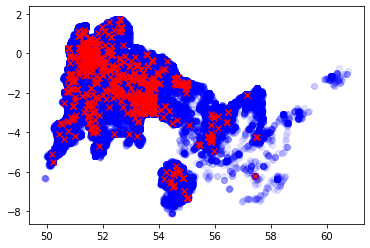

In [6]:
failedcomps = np.nonzero(y == 1)
notfailedcomps = np.nonzero(y == 0)

plt.scatter(x[notfailedcomps].T[0], x[notfailedcomps].T[1],
            marker='o', alpha=0.1, color='blue')
plt.scatter(x[failedcomps].T[0], x[failedcomps].T[1],
            marker='x', alpha=1.0, color='red')
plt.show()

In [14]:
# Now use Principal Component Analysis with Radial Basis Function kernel to decompose the lat/long
# representation into something more useful.

# Due to memory constraints, we have to do this on a smaller dataset:
xsmall = x[np.random.choice(np.array(range(0, len(x))), size=2000)]

# Create the kernel PCA object (project into 2 dimensions)
transformer = KernelPCA(n_components=2, kernel='rbf')

# Perform transformation:
xtransformed = transformer.fit_transform(xsmall)
print(xtransformed.shape)

(2000, 2)


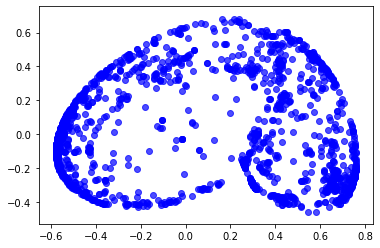

In [15]:
plt.scatter(xtransformed.T[0], xtransformed.T[1],
            marker='o', alpha=0.7, color='blue')
plt.show()